In [1]:
# load data from local file, fetch_openml() also works
import numpy as np
from sklearn.datasets import fetch_openml

# data = np.load('mnist_data.npz', allow_pickle=True)
# x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']

try:
    data = np.load('mnist_data_ALL.npz', allow_pickle=True)
    X_small = data['X_small']
    y_small = data['y_small']
#     print(y_small)
except FileNotFoundError:
    # If the data file does not exist, download and save the data
    X, y = fetch_openml('mnist_784', data_home='./', return_X_y=True)
    X = X / 255.
    X_small = X
    y_small = y
    # Save the data
    np.savez('mnist_data_ALL.npz', X_small=X_small, y_small=y_small)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)



# check the maximum value in your saved x_train & x_test, if max value <= 1, multiply with 255
X_train = X_train * 255
X_test = X_test * 255
# ensure y_train and y_test as integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

X_train.shape

(56000, 784)

In [2]:
# obtain a small set for the lab exercise
X_small = np.reshape(X_train[0:1000], (1000, 784))
Y_small = y_train[0:1000]
X_test = np.reshape(X_test[0:100], (100, 784))
Y_test = y_test[0:100]
print('data load finish')

data load finish


In [3]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_components = 0.99
pca = PCA(n_components=n_components)
X_small_trans = pca.fit_transform(X_small)
X_test_trans = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_small_trans, Y_small)

# Predict on the test set
y_pred = knn.predict(X_test_trans)

# Evaluate performance
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy with {n_components * 100}% information retained: {accuracy:.2f}')


Accuracy with 99.0% information retained: 0.90


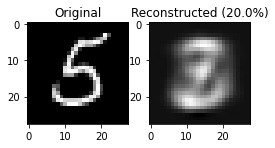

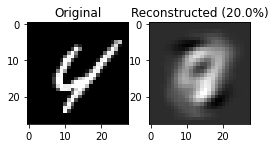

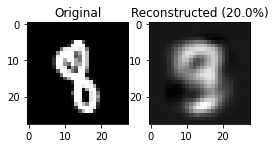

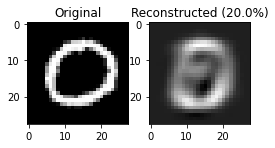

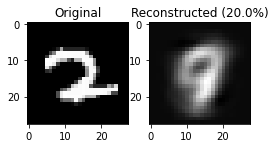

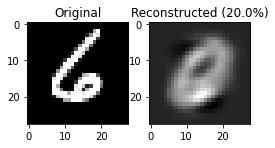

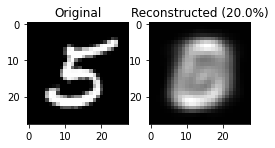

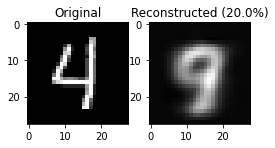

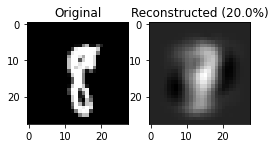

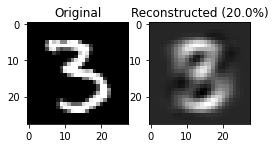

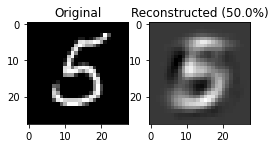

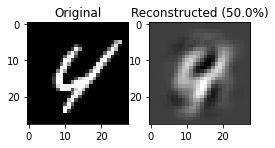

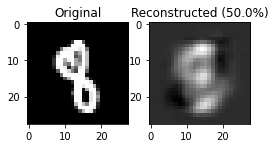

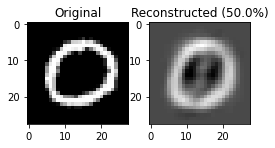

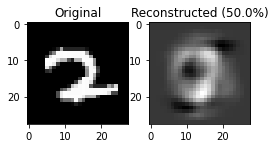

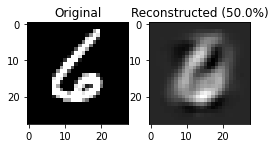

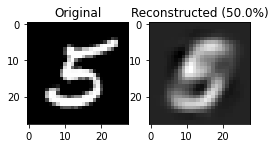

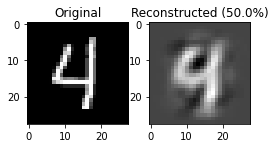

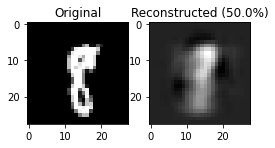

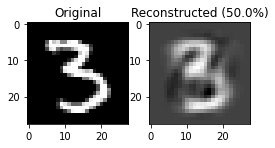

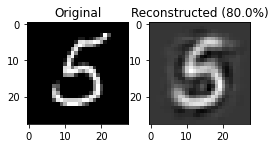

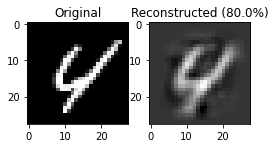

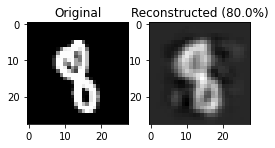

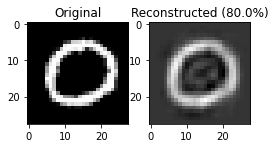

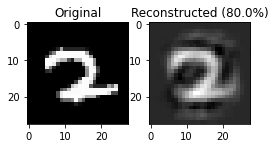

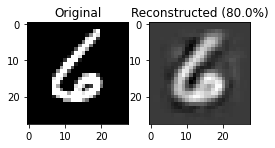

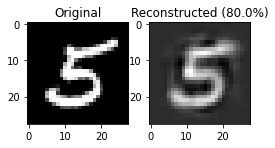

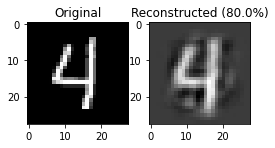

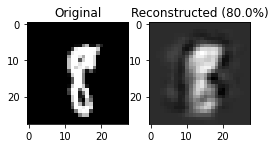

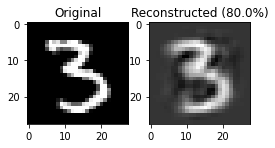

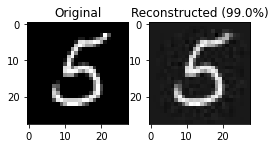

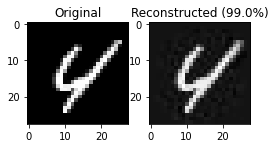

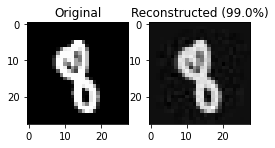

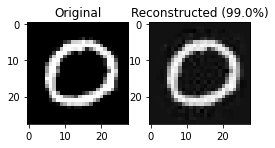

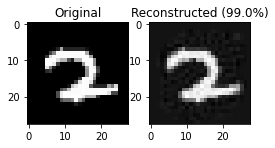

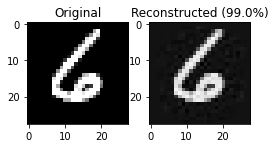

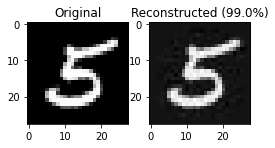

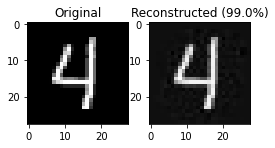

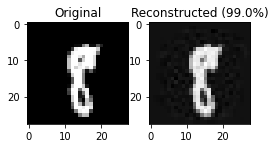

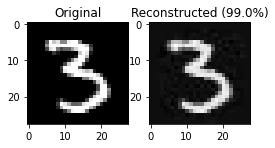

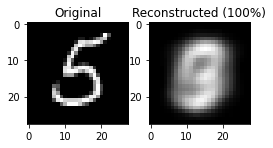

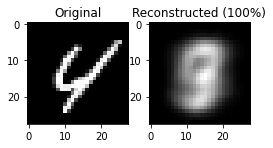

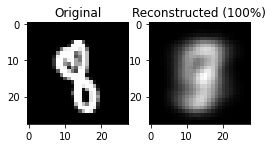

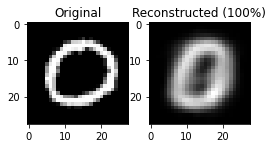

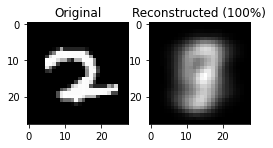

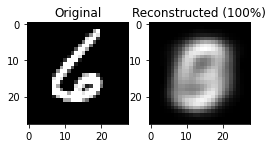

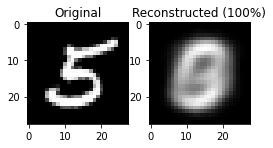

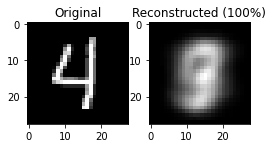

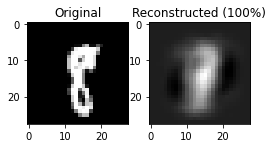

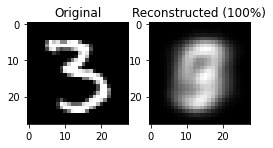

In [4]:
import matplotlib.pyplot as plt

# Function to perform PCA, reconstruct original features, and compare
def reconstruct_and_compare(n_components, X_train, X_test):
    # Perform PCA
    pca = PCA(n_components=n_components)
    X_train_trans = pca.fit_transform(X_train)
    X_test_trans = pca.transform(X_test)

    # Reconstruct original features
    X_train_reconst = pca.inverse_transform(X_train_trans)
    X_test_reconst = pca.inverse_transform(X_test_trans)

    # Select a few sample images for comparison (e.g., first 10 from the training data)
    sample_indices = range(10)

    # Plot original and reconstructed images side by side
    for i in sample_indices:
        plt.figure(figsize=(4, 2))

        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
        plt.title('Original')

        # Reconstructed image
        plt.subplot(1, 2, 2)
        plt.imshow(X_train_reconst[i].reshape(28, 28), cmap='gray')
        plt.title(f'Reconstructed ({n_components * 100}%)')

        plt.show()

# Reconstruct and compare for 20%, 50%, and 80% information retention
reconstruct_and_compare(0.2, X_small, X_test)
reconstruct_and_compare(0.5, X_small, X_test)
reconstruct_and_compare(0.8, X_small, X_test)
reconstruct_and_compare(0.99, X_small, X_test)
reconstruct_and_compare(1, X_small, X_test)
